In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray
import glob

In [2]:
path = '/jet/home/xjliu/Amazon_exp/Tanguro201401/'
with xarray.open_dataset(path+'wrfout_d01_2014-01-01_00:00:00',decode_times=True,
                         mask_and_scale='True') as ds:
    lats = ds['XLAT'][0,5:-5,5:-5]
    lons = ds['XLONG'][0,5:-5,5:-5]
    znu  = ds['ZNU'][0,:]

## Concatente variables and Check whether reach equilibrium

In [3]:
path = '/jet/home/xjliu/Amazon_exp/Tanguro201402/'
files = sorted(glob.glob(path+'3Dfields_d01_2014-02-*00:00:00'))

with xarray.open_dataset(files[0],decode_times=True,
                         mask_and_scale='True') as ds:
        Uall = ds['U'][:,:,5:-5,5:-5]
        Vall = ds['V'][:,:,5:-5,5:-5]
        Tall = ds['T'][:,:,5:-5,5:-5]
        T2all = ds['T2'][:,5:-5,5:-5]

for ii,filename in enumerate(files[1:12]):
    with xarray.open_dataset(filename,decode_times=True,
                         mask_and_scale='True') as ds:
        Uall = xarray.concat([Uall,ds['U'][:,:,5:-5,5:-5]],dim='Time')
        Vall = xarray.concat([Vall,ds['V'][:,:,5:-5,5:-5]],dim='Time')
        Tall = xarray.concat([Tall,ds['T'][:,:,5:-5,5:-5]],dim='Time')
        T2all = xarray.concat([T2all,ds['T2'][:,5:-5,5:-5]],dim='Time')
    print(Uall.shape,filename)

## concatenate 01-22-00:00
with xarray.open_dataset(path+'3Dfields_d01_2014-02-12_00:00:00',decode_times=True,
                         mask_and_scale='True') as ds:
    Uall = xarray.concat([Uall,ds['U'][0,:,5:-5,5:-5]],dim='Time')
    Vall = xarray.concat([Vall,ds['V'][0,:,5:-5,5:-5]],dim='Time')
    Tall = xarray.concat([Tall,ds['T'][0,:,5:-5,5:-5]],dim='Time')
    T2all = xarray.concat([T2all,ds['T2'][0,5:-5,5:-5]],dim='Time')
    print(Uall.shape,filename)
    
## concatenate the rest of files, starting from 01:00:00
files = sorted(glob.glob(path+'3Dfields_d01_2014-02-*01:00:00'))
for filename in files[:]:       
    with xarray.open_dataset(filename,decode_times=True,
                         mask_and_scale='True') as ds:
        #Uall = xarray.concat([Uall,ds['U'][:,:,5:-5,5:-5]],dim='Time')
        #Vall = xarray.concat([Vall,ds['V'][:,:,5:-5,5:-5]],dim='Time')
        Tall = xarray.concat([Tall,ds['T'][:,:,5:-5,5:-5]],dim='Time')
        T2all = xarray.concat([T2all,ds['T2'][:,5:-5,5:-5]],dim='Time')
        #print('hello')
    print(Uall.shape,filename)

(48, 34, 70, 71) /jet/home/xjliu/Amazon_exp/Tanguro201402/3Dfields_d01_2014-02-02_00:00:00
(72, 34, 70, 71) /jet/home/xjliu/Amazon_exp/Tanguro201402/3Dfields_d01_2014-02-03_00:00:00
(96, 34, 70, 71) /jet/home/xjliu/Amazon_exp/Tanguro201402/3Dfields_d01_2014-02-04_00:00:00
(120, 34, 70, 71) /jet/home/xjliu/Amazon_exp/Tanguro201402/3Dfields_d01_2014-02-05_00:00:00
(144, 34, 70, 71) /jet/home/xjliu/Amazon_exp/Tanguro201402/3Dfields_d01_2014-02-06_00:00:00
(168, 34, 70, 71) /jet/home/xjliu/Amazon_exp/Tanguro201402/3Dfields_d01_2014-02-07_00:00:00
(192, 34, 70, 71) /jet/home/xjliu/Amazon_exp/Tanguro201402/3Dfields_d01_2014-02-08_00:00:00
(216, 34, 70, 71) /jet/home/xjliu/Amazon_exp/Tanguro201402/3Dfields_d01_2014-02-09_00:00:00
(240, 34, 70, 71) /jet/home/xjliu/Amazon_exp/Tanguro201402/3Dfields_d01_2014-02-10_00:00:00
(264, 34, 70, 71) /jet/home/xjliu/Amazon_exp/Tanguro201402/3Dfields_d01_2014-02-11_00:00:00
(288, 34, 70, 71) /jet/home/xjliu/Amazon_exp/Tanguro201402/3Dfields_d01_2014-02-12_

### Plot the height-time section of U

In [4]:
weights = np.cos(np.deg2rad(lats))
weights.name = "weights"
weights

#Uall_weighted = Uall.weighted(weights)
#Uall_weighted.mean()
#Uall_weighted.mean((("west_east", "south_north")))
Umean = Uall.mean(("west_east_stag", "south_north"))
T2mean = T2all.mean(("west_east", "south_north"))
Vmean = Vall.mean(("west_east", "south_north_stag"))
Tmean = Tall.mean(("west_east", "south_north"))

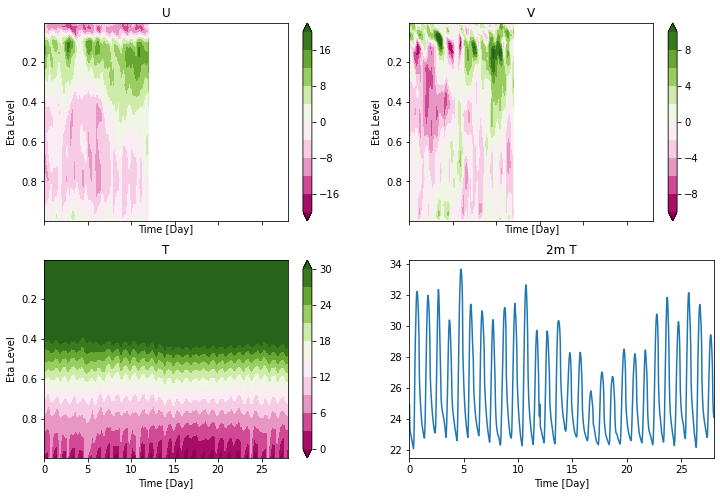

In [6]:
fig,axes = plt.subplots(2,2,figsize=(12,8),sharex=True)
axes = axes.ravel()
axes[3].plot(T2mean[:].Time/24,T2mean[:]-273.15)
axes[3].set_xlabel('Time [Day]')
#plt.ylabel('Level')
#plt.gca().invert_yaxis()

im0 = axes[0].contourf(Umean[:].Time/24,znu,Umean[:].transpose(),
             levels=np.linspace(-20,20,11),
             extend='both',
            cmap='PiYG')

im1 = axes[1].contourf(Vmean[:].Time/24,znu,Vmean[:].transpose(),
             levels=np.linspace(-10,10,11),
             extend='both',
            cmap='PiYG')
im2 = axes[2].contourf(Tmean[:].Time/24,znu,Tmean[:].transpose(),
             levels=np.linspace(0,30,11),
             extend='both',
            cmap='PiYG')
fig.colorbar(im0,ax=axes[0])
fig.colorbar(im1,ax=axes[1])
fig.colorbar(im2,ax=axes[2])

titles = ['U','V','T','2m T']
for ii in range(4):
    axes[ii].set_title(titles[ii])
    axes[ii].set_xlabel('Time [Day]')

for ii in range(3):
    axes[ii].invert_yaxis()
    axes[ii].set_ylabel('Eta Level')

fig.savefig('plot_Var_timeseries_obs_Feb_narrow.png',format='png',dpi=400,bbox_inches='tight')